# Replenishment

## Problem Statement

Develop a machine learning model that can predict the transaction_quantity for future months based on the historical data provided.

### `CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

### Business and Data Understanding

`**Objective(s):**` Maximize the restocking of items to maintain the required inventory levels 

`**Constraint(s):**` Minimize the stockouts to avoid unnecessary inconvenience to  customers

`**Success Criteria:**`

- `**Business Success Criteria:**` Reduction in stockouts and overstock situations, ensuring that the right products are available when needed. Improved customer satisfaction due to better product availability.

- `**Machine Learning Success Criteria:**` Achieve a high R-squared score indicating good predictive power. Maintain low MAE and MSE values to ensure accuracy of predictions.

- `**Economic Success Criteria:**` Higher sales due to better product availability and reduced stockouts. Quantifiable cost savings and increased revenue resulting from improved inventory management.


### Data Collection/Description

`**Data:**` The dataset contains historical transaction data of Replenishment process with the following columns:

`**Data Dictionary:**`
- Dataset contains 8 columns/features
- Dataset contains 117 records

`**Description:**`
- **transaction_log_id** - Unique identifier for each transaction log.
- **transaction_code** - Code indicating the type of transaction (305 for Replenishment (Pick) and 306 for Replenishment (Put)).
- **transaction_name** - Description of the transaction type.
- **transaction_month** - Month of the transaction.
- **warehouse_id** - Identifier for the warehouse where the transaction took place.
- **sku_number** - Stock Keeping Unit number, unique for each product.
- **before_quantity** - Quantity of the product before the transaction.
- **transaction_quantity** - Quantity of the product involved in the transaction (target variable).

### Importing required dependencies 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import pickle 
import mlflow
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading Dataset

In [2]:
# Load and prepare data
data = pd.read_excel(r"C:\Users\USER\Desktop\Replenishment\Replenishment_data.xlsx")
data

,transaction_log_id,transaction_code,transaction_name,warehouse_id,sku_number,before_quantity,transaction_month,transaction_quantity
0,1796,305,Replenishment (Pick),850,50000074,250,1,188
1,1797,306,Replenishment (Put),850,50000074,188,2,188
2,3274,305,Replenishment (Pick),850,50014535,120,3,60
3,3275,306,Replenishment (Put),850,50014535,60,4,60
4,3289,305,Replenishment (Pick),850,50000064,45,5,30
...,...,...,...,...,...,...,...,...
112,4327,306,Replenishment (Put),850,50000074,188,6,188
113,4328,305,Replenishment (Pick),850,50014535,120,7,60
114,4329,306,Replenishment (Put),850,50014535,60,8,60
115,4330,305,Replenishment (Pick),850,50000064,45,9,30


#### Exploratory Data Analysis

In [3]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   transaction_log_id    117 non-null    int64 
 1   transaction_code      117 non-null    int64 
 2   transaction_name      117 non-null    object
 3   warehouse_id          117 non-null    int64 
 4   sku_number            117 non-null    int64 
 5   before_quantity       117 non-null    int64 
 6   transaction_month     117 non-null    int64 
 7   transaction_quantity  117 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 7.4+ KB


In [4]:
# Display the shape of the dataset
data.shape

(117, 8)

In [5]:
# Display basic statistics of the dataset
data.describe()

,transaction_log_id,transaction_code,warehouse_id,sku_number,before_quantity,transaction_month,transaction_quantity
count,117.000000,117.000000,117.0,1.170000e+02,117.000000,117.000000,117.000000
mean,4113.307692,305.487179,850.0,5.000167e+07,53.282051,6.367521,43.111111
std,443.595254,0.501985,0.0,3.996234e+03,55.915861,3.407897,46.208071
min,1796.000000,305.000000,850.0,5.000006e+07,2.000000,1.000000,2.000000
25%,4244.000000,305.000000,850.0,5.000006e+07,30.000000,3.000000,20.000000
50%,4273.000000,305.000000,850.0,5.000006e+07,30.000000,6.000000,30.000000
75%,4302.000000,306.000000,850.0,5.000148e+07,50.000000,9.000000,30.000000
max,4331.000000,306.000000,850.0,5.001454e+07,250.000000,12.000000,188.000000


In [6]:
# pip install dtale
import dtale

d = dtale.show(data)
d.open_browser()

In [7]:
# Sweetviz
###########
# !pip install sweetviz
import sweetviz as sv

s = sv.analyze(data)
s.show_html()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Feature: transaction_month                   |███████▊  | [ 78%]   00:02 -> (00:00 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


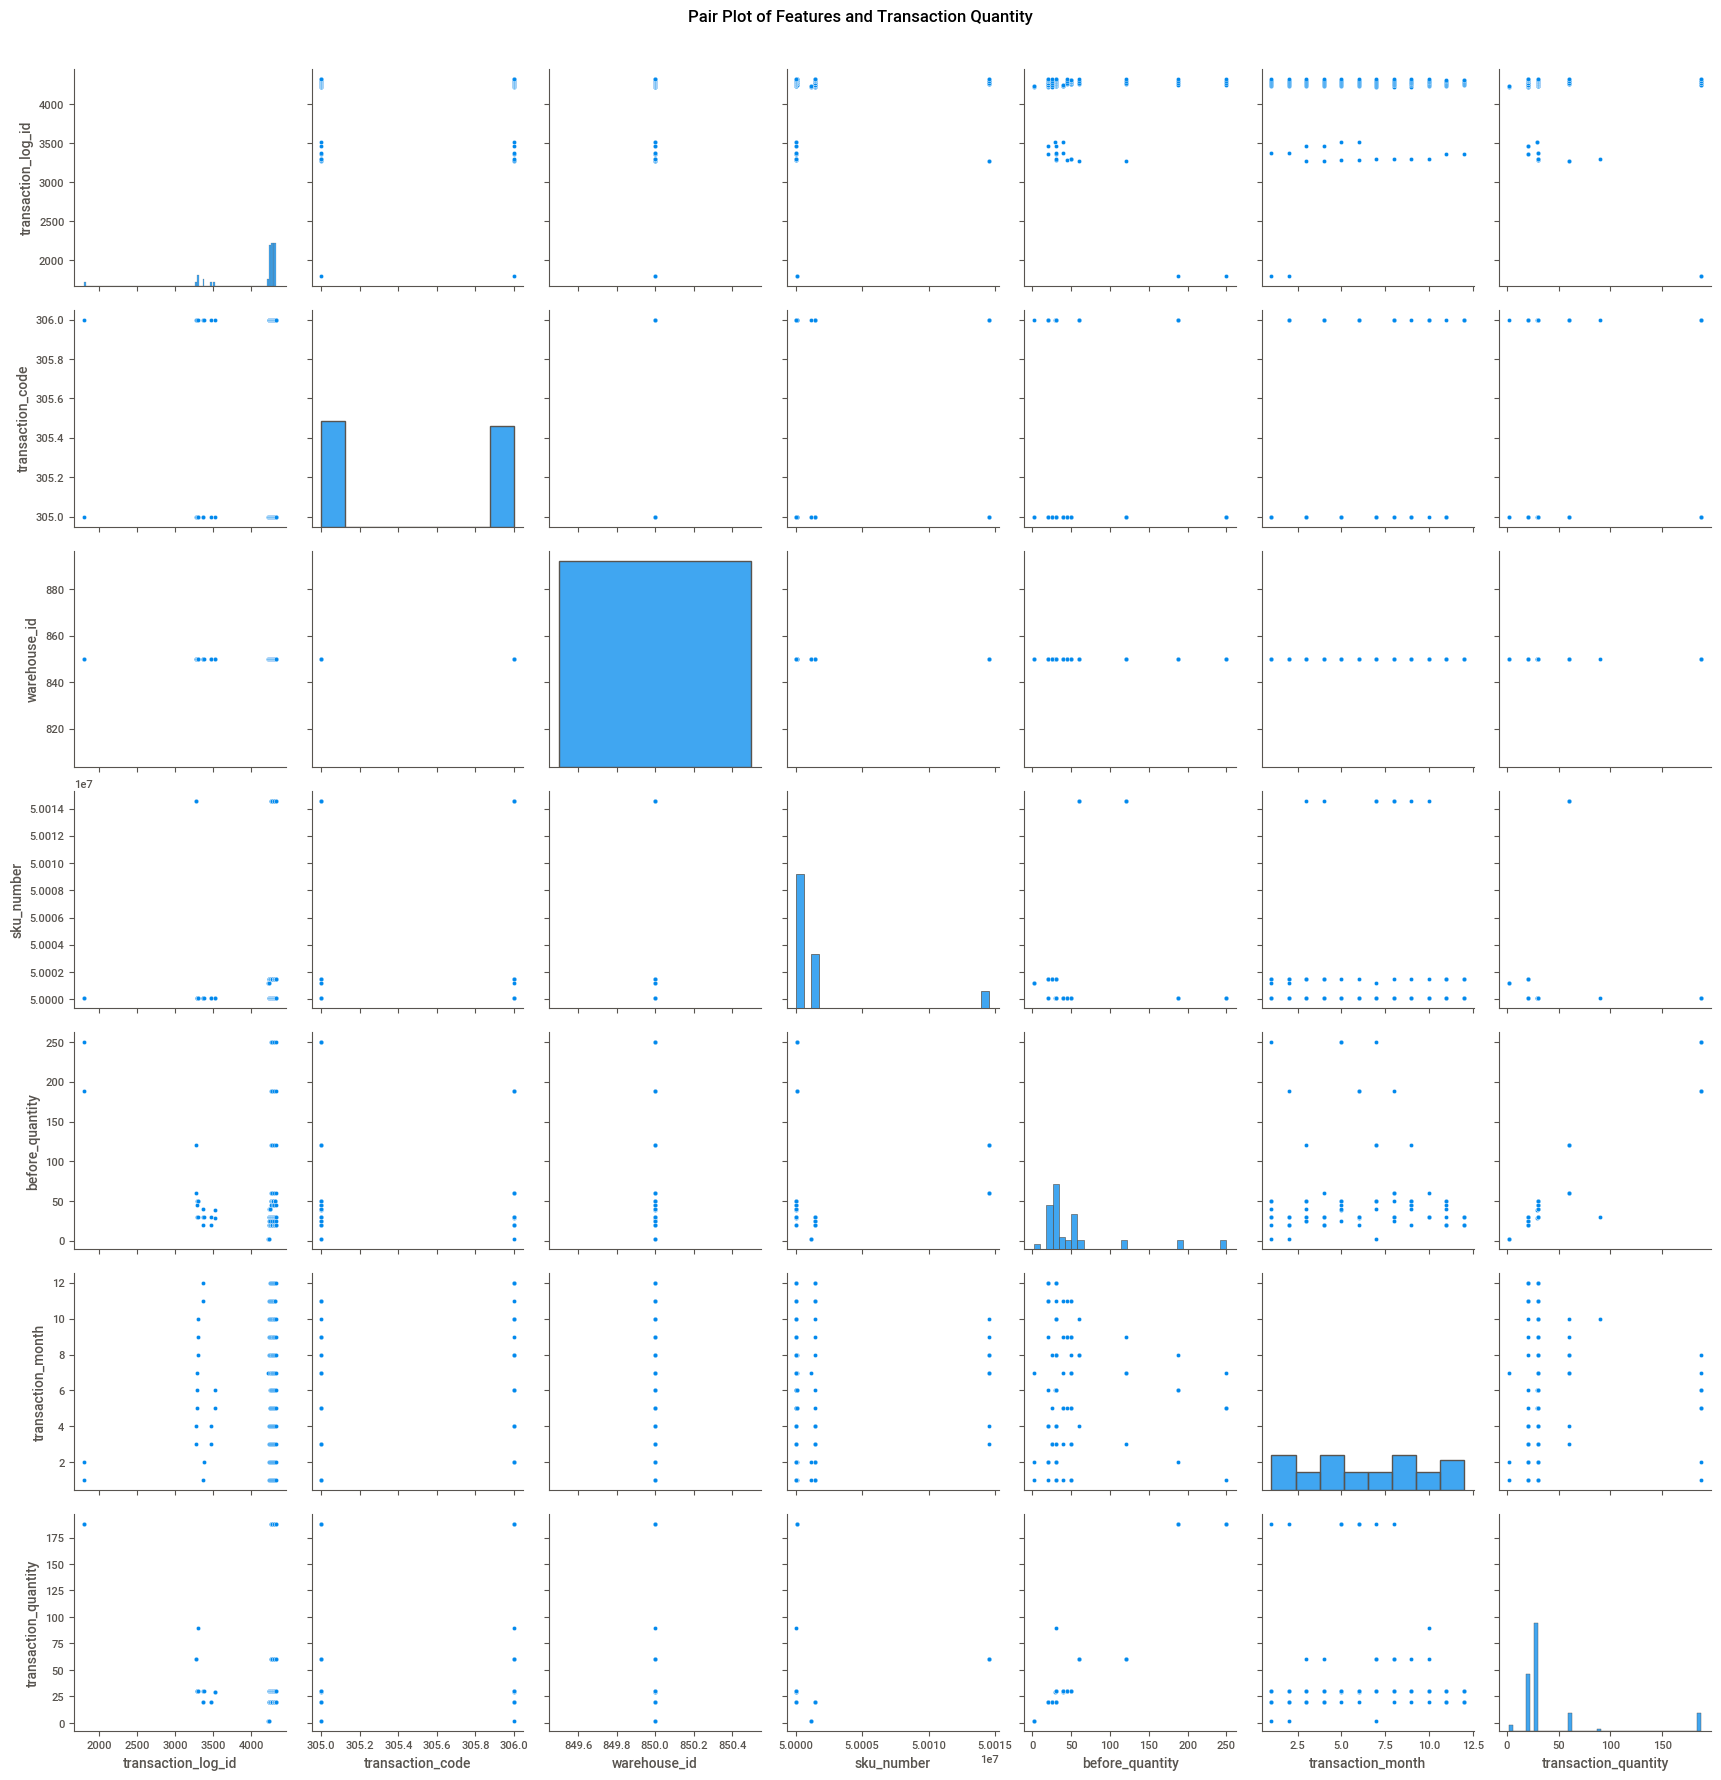

In [8]:
# Pair plot
sns.pairplot(data)
plt.suptitle('Pair Plot of Features and Transaction Quantity', y=1.02)
plt.show()


2024-07-25 10:31:12,325 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-25 10:31:12,331 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-25 10:31:12,405 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-25 10:31:12,410 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


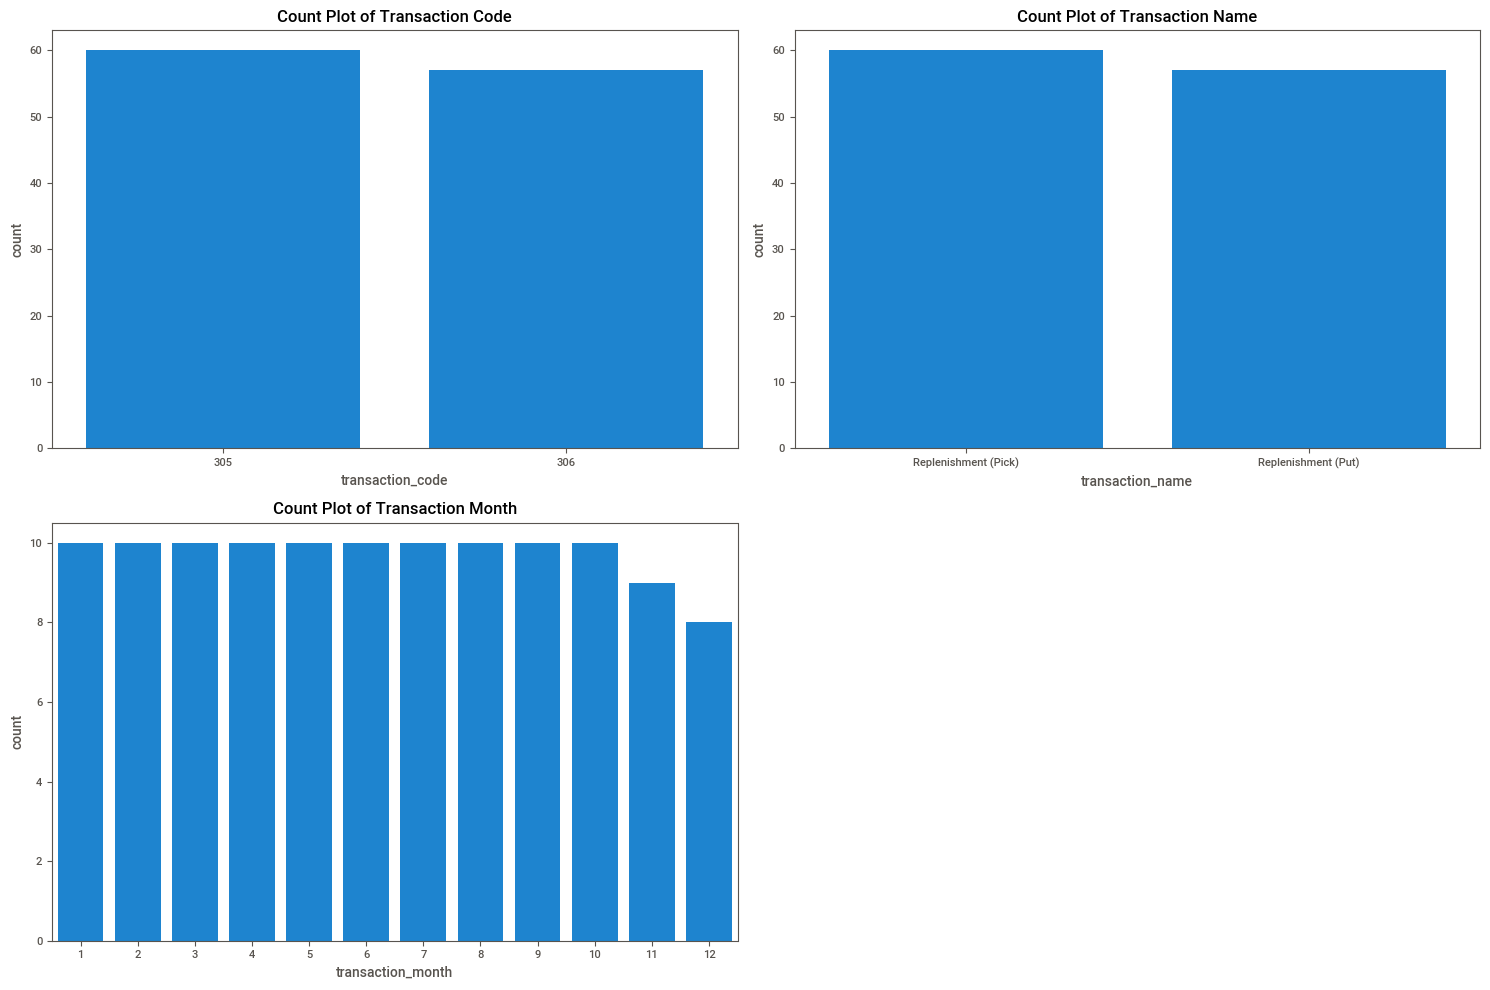

In [9]:
# Count plot of categorical features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='transaction_code', data=data)
plt.title('Count Plot of Transaction Code')

plt.subplot(2, 2, 2)
sns.countplot(x='transaction_name', data=data)
plt.title('Count Plot of Transaction Name')

plt.subplot(2, 2, 3)
sns.countplot(x='transaction_month', data=data)
plt.title('Count Plot of Transaction Month')

plt.tight_layout()
plt.show()


### Data Preparation/Preprocessing 

#### Dealing with Missing Values 

In [10]:
# check for missing values for each column if any
data.isnull().sum()
# there are no missing values in the dataset 

transaction_log_id      0
transaction_code        0
transaction_name        0
warehouse_id            0
sku_number              0
before_quantity         0
transaction_month       0
transaction_quantity    0
dtype: int64

#### Duplicate check and removing duplicates

In [11]:
# Check for duplicate rows in the dataset
duplicates = data.duplicated()
sum(duplicates)

0

### Feature Scaling 

#### Splitting the Dataset into Dependent and independent variables 

In [31]:
# Define features (X) and target variable (y)
X = data[['transaction_code', 'transaction_name', 'transaction_month', 'warehouse_id', 'sku_number', 'before_quantity']]
y = data['transaction_quantity']


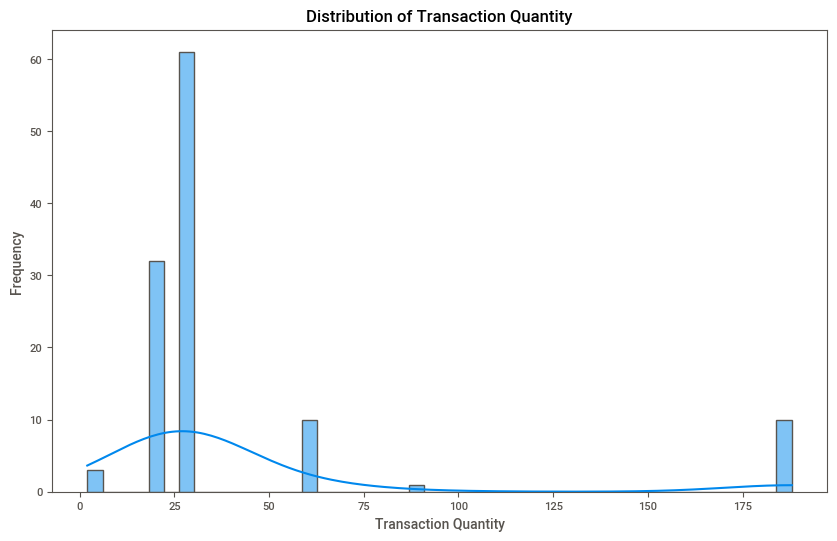

In [13]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['transaction_quantity'], kde=True)
plt.title('Distribution of Transaction Quantity')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
plt.show()

#### Encoding the categorical columns 

In [14]:
encode_columns = ['transaction_name', 'sku_number']

In [15]:
label_encodonneer = {}

In [16]:
for col in encode_columns:
    label_encoder[col] = LabelEncoder()
    X[col] = label_encoder[col].fit_transform(X[col])

C:\Users\USER\AppData\Local\Temp\ipykernel_3612\2381463219.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_3612\2381463219.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
X.iloc[0:1,:].to_json()

'{"transaction_code":{"0":305},"transaction_name":{"0":"Replenishment (Pick)"},"transaction_month":{"0":1},"warehouse_id":{"0":850},"sku_number":{"0":50000074},"before_quantity":{"0":250}}'

In [30]:
X

,transaction_code,transaction_name,transaction_month,warehouse_id,sku_number,before_quantity
0,305,0,1,850,1,250
1,306,1,2,850,1,188
2,305,0,3,850,4,120
3,306,1,4,850,4,60
4,305,0,5,850,0,45
...,...,...,...,...,...,...
112,306,1,6,850,1,188
113,305,0,7,850,4,120
114,306,1,8,850,4,60
115,305,0,9,850,0,45


#### Splitting the data into Training and Test datasets 

In [18]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Make a copy of the test set for later use
# X_test1 = X_test.copy()

In [20]:
# X_test1

In [21]:
# Save the test set to an Excel file
# X_test.to_excel("Testset.xlsx", index = False)

#### Dummy Variable Creation for Categorical Features

#### Scaling the Data to improve Model Convergence and performance

In [22]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

#### Random Forest Regression

In [23]:
# Create a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [24]:
# Make a copy of the test set for later use
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Predict on the test set using Random Forest Regressor
y_pred = model.predict(X_test)

In [26]:
y_pred

array([ 59.2       ,  29.98      ,  30.        , 188.        ,
        30.52714286,  20.        ,  29.8       ,  30.44373626,
        20.        ,  26.81373626,  20.        ,  29.9       ,
        29.7       ,  39.08198302,   4.7       , 188.        ,
        20.        , 188.        ,  29.99      ,  30.        ,
        39.08198302,  60.        ,  30.        ,  29.7       ])

#### Evaluation Metrics for Random Forest Regression

In [27]:
# Evaluate Random Forest Regressor model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2*100}')

MAE: 1.6824408924408918
MSE: 13.773748813322449
R²: 99.526321486525


In [ ]:
# # Convert y_pred to a DataFrame
# y_pred = y_pred.astype(int)
# y_pred = pd.DataFrame(y_pred, columns=['transaction_quantity'],  index=X_test1.index)

In [55]:
y_pred

array([ 59,  29,  30, 188,  30,  20,  29,  30,  20,  26,  20,  29,  29,
        39,   4, 188,  20, 188,  29,  30,  39,  60,  30,  29])

In [56]:
# Concatenate testset and predictions
# Output = pd.concat([X_test1, y_pred], axis = 1)

In [57]:
# Output

In [58]:
# Save the concatenated DataFrame to an Excel file
# Output.to_excel("Output.xlsx", index=False)

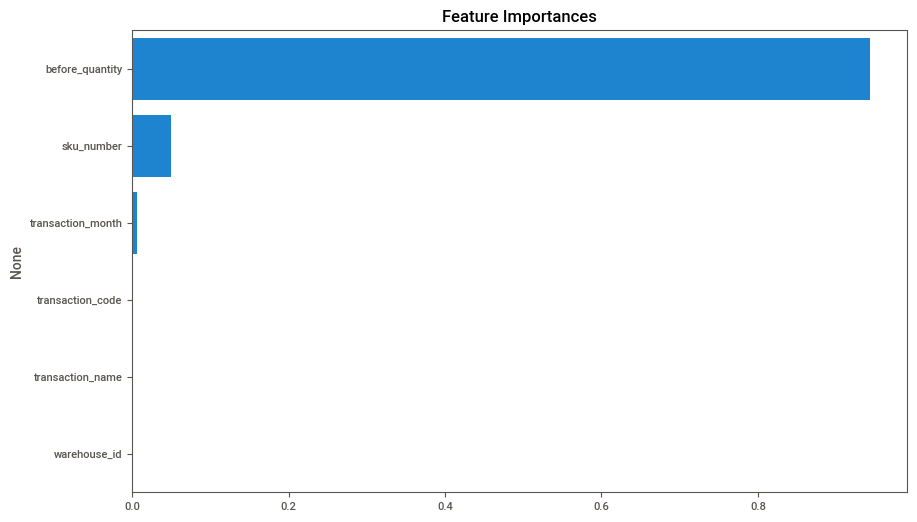

In [59]:
# Plot feature importances for Random Forest Regressor
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.show()

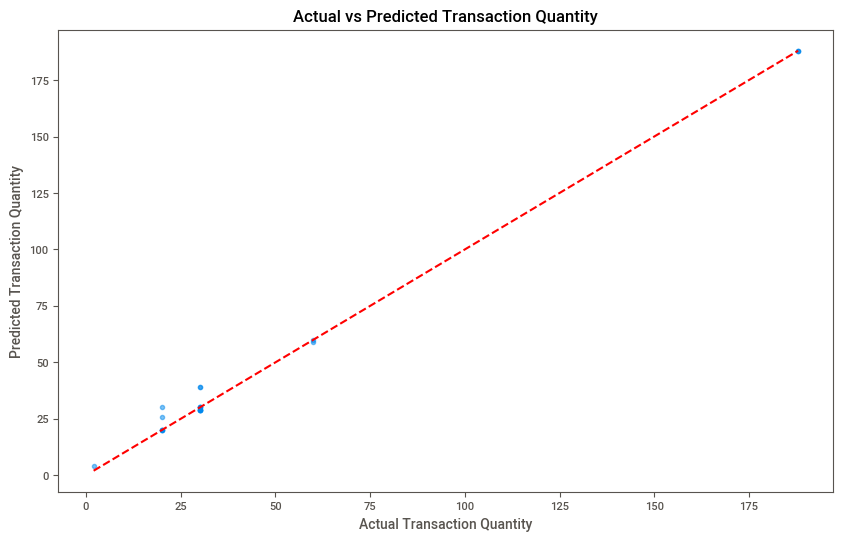

In [60]:
# Actual vs. Predicted plot
# Plot actual vs predicted values for the Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Transaction Quantity')
plt.ylabel('Predicted Transaction Quantity')
plt.title('Actual vs Predicted Transaction Quantity')
plt.show()

#### Support Vector Machine Regression

In [61]:
# Create and train the Support Vector Regressor (SVR) model
SVR_model = SVR(kernel='linear', C=1.0)
SVR_model.fit(X_train, y_train)

SVR(kernel='linear')

In [62]:
# Predict on the test set using SVR
y_pred_SVR = SVR_model.predict(X_test)

In [63]:
y_pred_SVR

array([ 41.94581108,  28.00623593,  30.30064057,  99.99414497,
        21.52409618,  17.93948387,  29.76596873,  30.10019721,
        24.22118026,  25.64507932,  24.35487165,  29.83281443,
        30.10010349,  30.03335151,   8.18962764, 118.83923778,
        24.28802595,  99.92729927,  29.89966012,  30.30064057,
        30.03335151,  60.0335717 ,  28.13992732,  25.6449856 ])

#### Evaluation Metrics for Support Vector Machine Regression 

In [64]:
# Evaluate SVR model
SVR_mae = mean_absolute_error(y_test, y_pred_SVR)
SVR_mse = mean_squared_error(y_test, y_pred_SVR)
SVR_r2 = r2_score(y_test, y_pred_SVR)

print(f'MAE: {SVR_mae}')
print(f'MSE: {SVR_mse}')
print(f'R^2: {SVR_r2}')

MAE: 12.54954868584752
MSE: 865.4004762988247
R^2: 0.7023892211702834


#### Linear Regression

In [65]:
# Create and train the Linear Regression model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predict on the test set using Linear Regression
y_pred_LR = LR_model.predict(X_test)

In [67]:
y_pred_LR

array([ 55.25047137,  28.402324  ,  32.27737089, 160.79691669,
        16.02718333,   9.50689147,  35.77718333,  35.15218333,
        24.75684459,  27.15208955,  24.50684459,  35.65218333,
        32.65237089,  35.27718333,  -8.13657589, 191.64749811,
        24.63184459, 160.92191669,  35.52718333,  32.27737089,
        35.27718333,  84.25103404,  28.152324  ,  24.65227711])

#### Evaluation Metrics for Linear regression

In [68]:
# Evaluate Linear Regression model
LR_mae = mean_absolute_error(y_test, y_pred_LR)
LR_mse = mean_squared_error(y_test, y_pred_LR)
LR_r2 = r2_score(y_test, y_pred_LR)

print(f'MAE: {LR_mae}')
print(f'MSE: {LR_mse}')
print(f'R^2: {LR_r2}')

MAE: 7.551776638945104
MSE: 111.31155143256291
R^2: 0.9617200146962364


### Model Dumping/Saving

In [72]:
replenish = {
    'model': model,
    'encoders': label_encoder
}

#### Joblib File

In [73]:
# # Save the Random Forest Regressor model using joblib
# joblib_file = 'Replenishment_joblib.joblib'
# joblib.dump(replenish, joblib_file)

['Replenishment_joblib.joblib']

#### Pickle File 

In [74]:
# Save the Random Forest Regressor model using pickle
with open('Replenishment_pickle.pkl', 'wb') as file:
    pickle.dump(replenish, file)